In [454]:
from sklearn.metrics import confusion_matrix
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score


In [455]:
k_min = 2
k_max = 20
target_column = 'Какой напиток Вы предпочитаете утром?'

In [456]:
data = pd.read_excel('coffe_or_tea.xlsx')
data.head()

,Опрашиваемый,Укажите Ваш пол,Какой напиток Вы предпочитаете утром?,Укажите Ваш возраст,Насколько здоровый образ жизни Вы ведете? \nУкажите число по шкале от 0 до 100,Курите ли Вы?,Укажите цвет Вашего левого глаза,Много ли Вы испытываете стресса в жизни? Укажите число от 0 до 100,Вы высыпаетесь?,Укажите Ваш хронотип,"Во сколько Вы обычно просыпаетесь? Укажите время в формате ""Час"" и ""Минуты""",Сколько Вы в среднем спите? Укажите среди время вашего сна,Если поблизости с Вашим домом кофейня?,Вы являетесь гурманом?,Вы работаете из офиса?,Вы домосед?,У Вас есть хронические заболевания?,Какой рукой Вы пишите?,Какой у Вас знак зодиака?
0,1,Женщина,Кофе,22,65,Да,Серо-зеленый,55,Да,Жаворонок,2024-09-21 08:00:00,8.0,Да,Да,Да,Нет,Нет,Правой,Козерог
1,2,Мужчина,Чай,21,85,Нет,Зеленый,70,Да,Жаворонок,2024-09-21 06:00:00,8.0,Да,Нет,Нет,Нет,Нет,Левой,Стрелец
2,3,Мужчина,Кофе,22,50,Да,Голубой,70,Да,Сова,2024-09-21 09:00:00,7.0,Да,Да,Нет,Да,Нет,Правой,Рак
3,4,Мужчина,Кофе,22,80,Да,Карий,60,Да,Сова,2024-09-21 09:00:00,6.0,Да,Да,Нет,Нет,Да,Правой,Скорпион
4,5,Женщина,Кофе,23,50,Нет,Голубой,90,Нет,Сова,2024-09-21 14:00:00,6.0,Нет,Нет,Нет,Да,Да,Левой,Скорпион


In [457]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 19 columns):
 #   Column                                                                         Non-Null Count  Dtype         
---  ------                                                                         --------------  -----         
 0   Опрашиваемый                                                                   38 non-null     int64         
 1   Укажите Ваш пол                                                                38 non-null     object        
 2   Какой напиток Вы предпочитаете утром?                                          38 non-null     object        
 3   Укажите Ваш возраст                                                            38 non-null     int64         
 4   Насколько здоровый образ жизни Вы ведете? 
Укажите число по шкале от 0 до 100  38 non-null     int64         
 5   Курите ли Вы?                                                                  38 non-n

## Очистка и форматирование данных

In [458]:
date_column = ['Во сколько Вы обычно просыпаетесь? Укажите время в формате "Час" и "Минуты"']
for line in date_column:
    data[line] = data[line].dt.strftime('%H')
    data[line] = data[line].astype('int')

data.head()

,Опрашиваемый,Укажите Ваш пол,Какой напиток Вы предпочитаете утром?,Укажите Ваш возраст,Насколько здоровый образ жизни Вы ведете? \nУкажите число по шкале от 0 до 100,Курите ли Вы?,Укажите цвет Вашего левого глаза,Много ли Вы испытываете стресса в жизни? Укажите число от 0 до 100,Вы высыпаетесь?,Укажите Ваш хронотип,"Во сколько Вы обычно просыпаетесь? Укажите время в формате ""Час"" и ""Минуты""",Сколько Вы в среднем спите? Укажите среди время вашего сна,Если поблизости с Вашим домом кофейня?,Вы являетесь гурманом?,Вы работаете из офиса?,Вы домосед?,У Вас есть хронические заболевания?,Какой рукой Вы пишите?,Какой у Вас знак зодиака?
0,1,Женщина,Кофе,22,65,Да,Серо-зеленый,55,Да,Жаворонок,8,8.0,Да,Да,Да,Нет,Нет,Правой,Козерог
1,2,Мужчина,Чай,21,85,Нет,Зеленый,70,Да,Жаворонок,6,8.0,Да,Нет,Нет,Нет,Нет,Левой,Стрелец
2,3,Мужчина,Кофе,22,50,Да,Голубой,70,Да,Сова,9,7.0,Да,Да,Нет,Да,Нет,Правой,Рак
3,4,Мужчина,Кофе,22,80,Да,Карий,60,Да,Сова,9,6.0,Да,Да,Нет,Нет,Да,Правой,Скорпион
4,5,Женщина,Кофе,23,50,Нет,Голубой,90,Нет,Сова,14,6.0,Нет,Нет,Нет,Да,Да,Левой,Скорпион


In [459]:
column_list = data.columns.tolist()

for column in column_list:
    unique_values = data[column].unique()
    if len(unique_values) == 2:
        data[column] = data[column].replace('Да', True)
        data[column] = data[column].replace('Нет', False)

data.head()

,Опрашиваемый,Укажите Ваш пол,Какой напиток Вы предпочитаете утром?,Укажите Ваш возраст,Насколько здоровый образ жизни Вы ведете? \nУкажите число по шкале от 0 до 100,Курите ли Вы?,Укажите цвет Вашего левого глаза,Много ли Вы испытываете стресса в жизни? Укажите число от 0 до 100,Вы высыпаетесь?,Укажите Ваш хронотип,"Во сколько Вы обычно просыпаетесь? Укажите время в формате ""Час"" и ""Минуты""",Сколько Вы в среднем спите? Укажите среди время вашего сна,Если поблизости с Вашим домом кофейня?,Вы являетесь гурманом?,Вы работаете из офиса?,Вы домосед?,У Вас есть хронические заболевания?,Какой рукой Вы пишите?,Какой у Вас знак зодиака?
0,1,Женщина,Кофе,22,65,True,Серо-зеленый,55,True,Жаворонок,8,8.0,True,True,True,False,False,Правой,Козерог
1,2,Мужчина,Чай,21,85,False,Зеленый,70,True,Жаворонок,6,8.0,True,False,False,False,False,Левой,Стрелец
2,3,Мужчина,Кофе,22,50,True,Голубой,70,True,Сова,9,7.0,True,True,False,True,False,Правой,Рак
3,4,Мужчина,Кофе,22,80,True,Карий,60,True,Сова,9,6.0,True,True,False,False,True,Правой,Скорпион
4,5,Женщина,Кофе,23,50,False,Голубой,90,False,Сова,14,6.0,False,False,False,True,True,Левой,Скорпион


In [460]:
columns_to_drop = ['Опрашиваемый', 'Какой рукой Вы пишите?', 'Какой у Вас знак зодиака?']
data_cleaned = data.drop(columns=columns_to_drop)

In [461]:
categorical_cols = ['Укажите Ваш пол', 'Курите ли Вы?',
                    'Вы высыпаетесь?',
                    'Если поблизости с Вашим домом кофейня?', 'Вы являетесь гурманом?',
                    'Вы работаете из офиса?', 'Вы домосед?', 'У Вас есть хронические заболевания?']
data_cleaned[categorical_cols] = data_cleaned[categorical_cols].apply(LabelEncoder().fit_transform)


In [462]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
numeric_cols = ['Укажите Ваш возраст',
                'Насколько здоровый образ жизни Вы ведете? \nУкажите число по шкале от 0 до 100',
                'Много ли Вы испытываете стресса в жизни? Укажите число от 0 до 100',
                'Сколько Вы в среднем спите? Укажите среди время вашего сна']
data_cleaned[numeric_cols] = scaler.fit_transform(data_cleaned[numeric_cols])

data_cleaned.head()

,Укажите Ваш пол,Какой напиток Вы предпочитаете утром?,Укажите Ваш возраст,Насколько здоровый образ жизни Вы ведете? \nУкажите число по шкале от 0 до 100,Курите ли Вы?,Укажите цвет Вашего левого глаза,Много ли Вы испытываете стресса в жизни? Укажите число от 0 до 100,Вы высыпаетесь?,Укажите Ваш хронотип,"Во сколько Вы обычно просыпаетесь? Укажите время в формате ""Час"" и ""Минуты""",Сколько Вы в среднем спите? Укажите среди время вашего сна,Если поблизости с Вашим домом кофейня?,Вы являетесь гурманом?,Вы работаете из офиса?,Вы домосед?,У Вас есть хронические заболевания?
0,0,Кофе,0.299626,-0.236110,1,Серо-зеленый,-0.186548,1,Жаворонок,8,0.782175,1,1,1,0,0
1,1,Чай,-0.649189,0.858059,0,Зеленый,-0.046268,1,Жаворонок,6,0.782175,1,0,0,0,0
2,1,Кофе,0.299626,-1.056738,1,Голубой,-0.046268,1,Сова,9,-0.118511,1,1,0,1,0
3,1,Кофе,0.299626,0.584517,1,Карий,-0.139788,1,Сова,9,-1.019198,1,1,0,0,1
4,0,Кофе,1.248440,-1.056738,0,Голубой,0.140773,0,Сова,14,-1.019198,0,0,0,1,1


In [463]:
label_encoder = LabelEncoder()
data_cleaned['Какой напиток Вы предпочитаете утром?'] = label_encoder.fit_transform(
    data_cleaned['Какой напиток Вы предпочитаете утром?'])

In [464]:
data_cleaned = pd.get_dummies(data_cleaned)
data_cleaned.head()

,Укажите Ваш пол,Какой напиток Вы предпочитаете утром?,Укажите Ваш возраст,Насколько здоровый образ жизни Вы ведете? \nУкажите число по шкале от 0 до 100,Курите ли Вы?,Много ли Вы испытываете стресса в жизни? Укажите число от 0 до 100,Вы высыпаетесь?,"Во сколько Вы обычно просыпаетесь? Укажите время в формате ""Час"" и ""Минуты""",Сколько Вы в среднем спите? Укажите среди время вашего сна,Если поблизости с Вашим домом кофейня?,...,Укажите цвет Вашего левого глаза_Карий,Укажите цвет Вашего левого глаза_Коричневый,Укажите цвет Вашего левого глаза_Серо-голубой,Укажите цвет Вашего левого глаза_Серо-зеленый,Укажите цвет Вашего левого глаза_Серый,Укажите цвет Вашего левого глаза_Синий,"Укажите цвет Вашего левого глаза_Такой же, как и правого",Укажите цвет Вашего левого глаза_карий,Укажите Ваш хронотип_Жаворонок,Укажите Ваш хронотип_Сова
0,0,0,0.299626,-0.236110,1,-0.186548,1,8,0.782175,1,...,False,False,False,True,False,False,False,False,True,False
1,1,1,-0.649189,0.858059,0,-0.046268,1,6,0.782175,1,...,False,False,False,False,False,False,False,False,True,False
2,1,0,0.299626,-1.056738,1,-0.046268,1,9,-0.118511,1,...,False,False,False,False,False,False,False,False,False,True
3,1,0,0.299626,0.584517,1,-0.139788,1,9,-1.019198,1,...,True,False,False,False,False,False,False,False,False,True
4,0,0,1.248440,-1.056738,0,0.140773,0,14,-1.019198,0,...,False,False,False,False,False,False,False,False,False,True


## Выбор целевого параметра и разделение датасета на выборки

In [481]:
X = data_cleaned.drop(columns=[target_column])
y = data_cleaned[target_column]
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [487]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

## Простой перебор

In [488]:
accuracy_scores = []

for k in range(k_min, k_max + 1):
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)

    predictions = model.predict(X_test)

    accuracy_scores.append(model.score(X_test, y_test))

max_accuracy = max(accuracy_scores)
print(max_accuracy)
k = accuracy_scores.index(max_accuracy) + k_min
print(k)

0.875
11


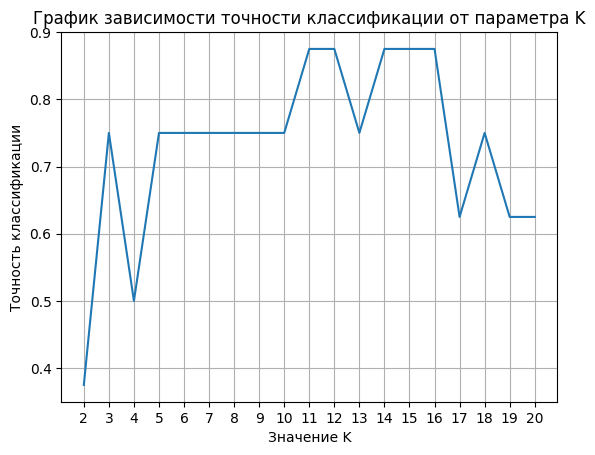

In [489]:
plt.title('График зависимости точности классификации от параметра K')

plt.xlabel('Значение K')
plt.ylabel('Точность классификации')

plt.plot(range(k_min, k_max + 1), accuracy_scores)
plt.xticks(range(k_min, k_max + 1))
plt.grid(True)

plt.show()

## Кросс-валидация и оценка метрика

In [490]:
# Задаём диапазон значений k для поиска
param_grid = {'n_neighbors': range(k_min, k_max + 1)}  # Диапазон значений k

knn = KNeighborsClassifier()

grid_search = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy')

grid_search.fit(X, y)

best_k = grid_search.best_params_['n_neighbors']
best_score = grid_search.best_score_

print(f'Лучшее значение k: {best_k}, точность: {best_score}')

model = KNeighborsClassifier(n_neighbors = best_k)
model.fit(X_train, y_train)

predictions = model.predict(X_test)

accuracy = accuracy_score(y_test, predictions)
f1 = f1_score(y_test, predictions, average='weighted')
precision = precision_score(y_test, predictions, average='weighted')
recall = recall_score(y_test, predictions, average='weighted')
print(f'Accuracy: {accuracy}')
print(f'F1-Score: {f1}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'Матрица ошибок: \n{confusion_matrix(y_test, predictions)}')

Лучшее значение k: 5, точность: 0.725
Accuracy: 0.75
F1-Score: 0.75
Precision: 0.75
Recall: 0.75
Матрица ошибок: 
[[2 1]
 [1 4]]
